## **FeyNN Labs: Project - 2**
**McDonalds Case Study**
=====================================

----------

#### **Import libraries**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


#### **Load the dataset**

In [89]:
df = pd.read_csv(r'C:\Users\Mukesh Sharma\Desktop\mcdonalds.csv')

#### **Shape of the dataset**

In [90]:
df.shape

(1453, 15)

#### **columns of the dataset**

In [91]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

#### **Head of the dataset**

In [92]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


#### **Tail of the dataset**

In [93]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


#### **Info of the dataset**

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


#### **Data types of the dataset**

In [95]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

#### **Statistical summary of the dataset**

In [96]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


#### **chack the null value in dataset**|

In [97]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [98]:
df.isnull().sum()/df.shape[0]*100

yummy             0.0
convenient        0.0
spicy             0.0
fattening         0.0
greasy            0.0
fast              0.0
cheap             0.0
tasty             0.0
expensive         0.0
healthy           0.0
disgusting        0.0
Like              0.0
Age               0.0
VisitFrequency    0.0
Gender            0.0
dtype: float64

<Axes: >

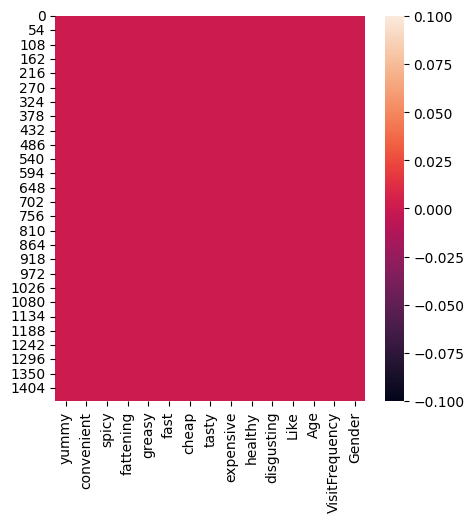

In [99]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

#### Convert categorical Yes/No responses to binary

In [100]:
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 
                  'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == "Yes" else 0)


#### Convert 'Like' column to numeric

In [101]:
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')
df['Like']


0      -3.0
1       2.0
2       1.0
3       4.0
4       2.0
       ... 
1448    NaN
1449    2.0
1450    3.0
1451    4.0
1452   -3.0
Name: Like, Length: 1453, dtype: float64

#### Encode VisitFrequency into ordered categories

In [102]:
visit_mapping = {
    "Once a week": 4, "Once a month": 3, "Every three months": 2, 
    "Once a year": 1, "Never": 0
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_mapping)
df['VisitFrequency']

0       2.0
1       2.0
2       2.0
3       4.0
4       3.0
       ... 
1448    1.0
1449    4.0
1450    3.0
1451    2.0
1452    2.0
Name: VisitFrequency, Length: 1453, dtype: float64

#### Encode Gender as binary (Male = 0, Female = 1)

In [103]:
df['Gender'] = df['Gender'].map({"Male": 0, "Female": 1})
df['Gender']

0       1
1       1
2       1
3       1
4       0
       ..
1448    0
1449    1
1450    1
1451    0
1452    0
Name: Gender, Length: 1453, dtype: int64

### Fill missing values with median

In [104]:
df['Like'].fillna(df['Like'].median(), inplace=True)
df['VisitFrequency'].fillna(df['VisitFrequency'].median(), inplace=True)

#### Select features for clustering

In [105]:
features = binary_columns + ['Like', 'Age', 'VisitFrequency', 'Gender']

### Standardize data

In [106]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
df_scaled

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.15325815,
        -0.22900225,  0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.44983942,
        -0.22900225,  0.918645  ],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.22360002,
        -0.22900225,  0.918645  ],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.5201813 ,
         0.61337817,  0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.2535793 ,
        -0.22900225, -1.08855979],
       [-1.11147857,  0.31873518, -0.32134871, ..., -1.0273399 ,
        -0.22900225, -1.08855979]], shape=(1453, 15))

#### Determine optimal number of clusters using Elbow Method

In [107]:
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

#### Plot Elbow Method

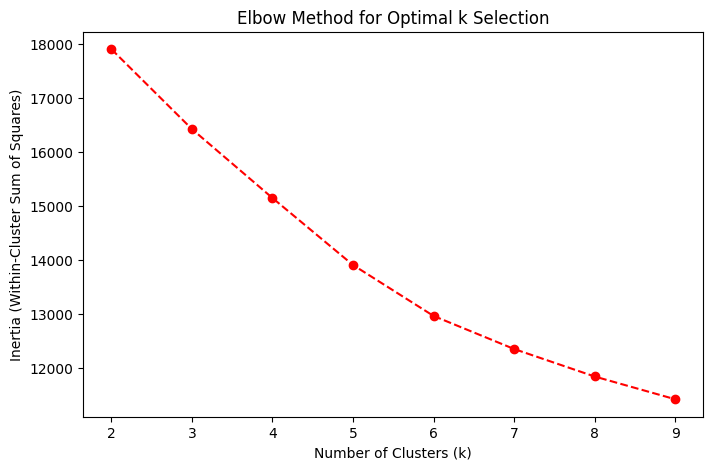

In [108]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='dashed', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k Selection")
plt.show()

####  Apply K-Means with optimal K=4

In [109]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(df_scaled)
df['Segment']


0       2
1       3
2       3
3       1
4       2
       ..
1448    2
1449    1
1450    3
1451    1
1452    2
Name: Segment, Length: 1453, dtype: int32

#### Analyze segment sizes

In [110]:
print(df['Segment'].value_counts())


Segment
1    592
2    408
3    336
0    117
Name: count, dtype: int64


####  Segment Profiling

In [111]:
segment_profiles = df.groupby("Segment")[features].mean()
segment_profiles

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
Segment,,,,,,,,,,,,,,,
0,0.051282,0.000000,0.068376,0.863248,0.735043,0.623932,0.341880,0.094017,0.641026,0.059829,0.803419,-0.264957,48.675214,0.854701,0.452991
1,0.858108,0.981419,0.084459,0.793919,0.346284,0.964527,0.923986,0.951014,0.013514,0.315878,0.032095,2.108108,43.067568,2.854730,0.611486
2,0.044118,1.000000,0.090686,0.950980,0.683824,0.926471,0.615196,0.176471,0.316176,0.063725,0.500000,-0.835784,49.426471,1.443627,0.546569
3,0.806548,0.982143,0.122024,0.895833,0.580357,0.851190,0.095238,0.863095,0.916667,0.205357,0.107143,1.764881,40.041667,2.744048,0.446429


####  Visualize segment profiles

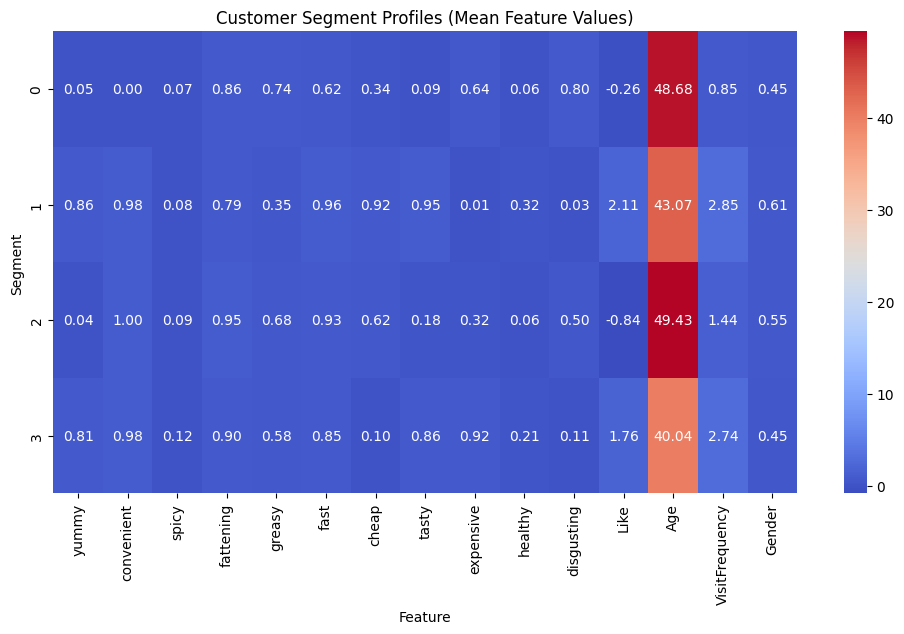

In [112]:
plt.figure(figsize=(12, 6))
sns.heatmap(segment_profiles, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Customer Segment Profiles (Mean Feature Values)")
plt.xlabel("Feature")
plt.ylabel("Segment")
plt.show()
